In [3]:
import numpy as np 
import pandas as pd 

from umap import UMAP
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

from pprint import pprint

In [4]:
style = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Brewer%20Friend%20Beer%20Recipes/styleData.csv', delimiter=',', encoding='latin')
recipe = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Brewer%20Friend%20Beer%20Recipes/recipeData.csv', delimiter=',', encoding='latin')

In [5]:
relevant_columns = ['Name', 'Style', 'StyleID', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency', 'SugarScale']

# these columns will be used for the embedding
data_columns = ['OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilTime', 'Efficiency']

# take the relevant columns
data = recipe[relevant_columns].copy()
data = data[data['SugarScale'].isin(['Specific Gravity'])].copy()
data = data.dropna(how='any').copy()
# drop rows with missing data
X = data[data_columns].copy()

# scale the data by mean and standard deviation
scaler = StandardScaler()
X_normed = scaler.fit_transform(X)

# subsample the data for embedding
np.random.seed(0)
num_to_subsample = 4000
random_idxs = np.random.permutation(X.shape[0])[:num_to_subsample]
X_normed_subsampled = X_normed[random_idxs]
data_subsampled = data.iloc[random_idxs, :].copy()

In [6]:
np.random.seed(1)
X_trans = UMAP(metric='l1').fit_transform(X_normed_subsampled)

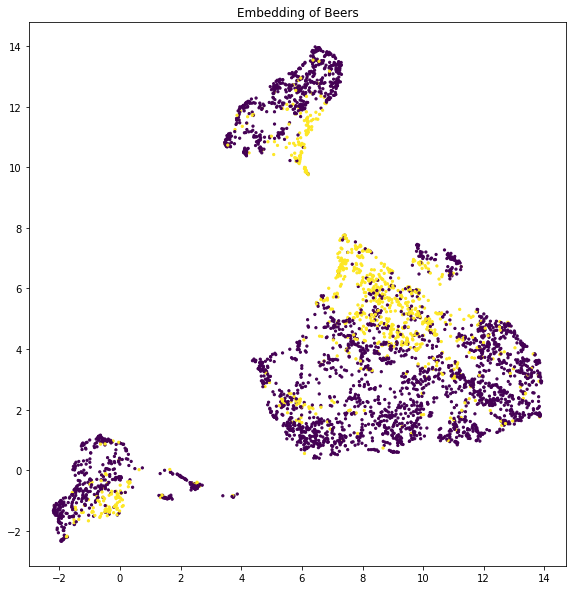

In [7]:
fig, ax = plt.subplots()

# color = data_subsampled['StyleID']
color = data_subsampled['Style'].str.contains('IPA|Indian Pale Ale', case=True)

ax.scatter(X_trans[:,0], X_trans[:,1], s=5, c=color)
ax.set_title('Embedding of Beers')
# ax.set_xticks([])
# ax.set_yticks([])


ax.set_aspect('equal')
fig.set_size_inches(10, 10)

In [8]:
top_cluster = data_subsampled['Style'][X_trans[:,1]>5].copy()
styles_in_top_cluster = top_cluster.value_counts()

In [9]:
ll_cluster = data_subsampled['Style'][np.logical_and(X_trans[:,0]<-2, X_trans[:,1]<0)]
styles_in_ll_cluster = ll_cluster.value_counts()

In [10]:
r_cluster = data_subsampled['Style'][np.logical_and(X_trans[:,0]>-3, X_trans[:,1]<5)].copy()
styles_in_r_cluster = r_cluster.value_counts()

In [11]:
r_diff = styles_in_r_cluster.add(-styles_in_ll_cluster.add(styles_in_top_cluster, fill_value=0), fill_value=0)
r_diff[r_diff>0].sort_values(ascending=False).iloc[:15]

American Pale Ale         238.0
American Light Lager       86.0
American Amber Ale         60.0
Saison                     59.0
American Brown Ale         56.0
American Stout             56.0
Blonde Ale                 52.0
Sweet Stout                45.0
Robust Porter              38.0
Irish Red Ale              35.0
American Porter            35.0
California Common Beer     34.0
Oatmeal Stout              33.0
Strong Bitter              29.0
American Wheat Beer        27.0
Name: Style, dtype: float64

In [12]:
ll_diff = styles_in_ll_cluster.add(-styles_in_r_cluster.add(styles_in_top_cluster, fill_value=0), fill_value=0)
ll_diff[ll_diff>0].sort_values(ascending=False).iloc[:15]

Series([], Name: Style, dtype: float64)

In [13]:
top_diff = styles_in_top_cluster.add(-styles_in_r_cluster.add(styles_in_ll_cluster, fill_value=0), fill_value=0)
top_diff[top_diff>0].sort_values(ascending=False).iloc[:15]

Imperial IPA                  46.0
Double IPA                    36.0
American IPA                  13.0
English Barleywine             9.0
American Barleywine            6.0
Specialty IPA: Rye IPA         6.0
English IPA                    5.0
Maibock/Helles Bock            5.0
Strong Scotch Ale              5.0
Specialty IPA: Brown IPA       4.0
Czech Premium Pale Lager       4.0
American Strong Ale            4.0
Specialty IPA: Belgian IPA     3.0
Wee Heavy                      3.0
Premium American Lager         2.0
Name: Style, dtype: float64

In [14]:
pprint(set(list(ll_cluster.values)).difference(set(list(r_cluster.values)+list(top_cluster.values))))

set()


In [15]:
pprint(set(list(top_cluster.values)).difference(set(list(ll_cluster.values)+list(r_cluster.values))))

{'Australian Sparkling Ale',
 'Classic Rauchbier',
 'Maibock/Helles Bock',
 'North German Altbier',
 'Wheatwine',
 'Wild Specialty Beer'}


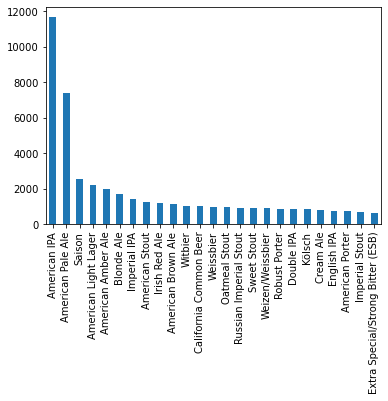

In [16]:
data['Style'].value_counts().iloc[:25].plot.bar()